In [32]:
from dbn import DeepBeliefNet
from util import *



In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:

image_size = [28,28]
train_imgs,train_lbls,test_imgs,test_lbls = read_mnist(dim=image_size, n_train=60000, n_test=10000)



dbn = DeepBeliefNet(sizes={"vis":image_size[0]*image_size[1], "hid":500, "pen":500, "top":2000, "lbl":10},
                        image_size=image_size,
                        n_labels=10,
                        batch_size=10
    )
    


In [34]:
    # greedy layer-wise training 
dbn.train_greedylayerwise(vis_trainset=train_imgs, lbl_trainset=train_lbls, n_iterations=10)


loaded rbm[vis--hid] from trained_rbm
loaded rbm[hid--pen] from trained_rbm
loaded rbm[pen+lbl--top] from trained_rbm


accuracy = 22.00% nb_gibbs= 10
accuracy = 27.00% nb_gibbs= 20
accuracy = 41.00% nb_gibbs= 40
accuracy = 57.00% nb_gibbs= 80


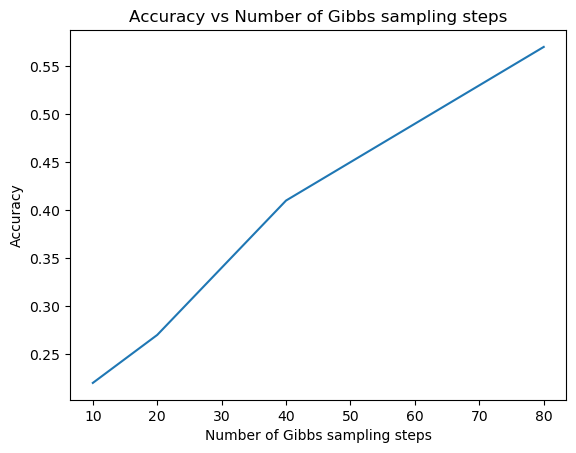

In [28]:
list_gibbs =[10,20,40,80]
short_train = train_imgs[0:100]
short_lbls = train_lbls[0:100]
accuracy = []
for i in range(len(list_gibbs)):
    accuracy.append(dbn.recognize(short_train,short_lbls, nb_gibbs_recog=list_gibbs[i]))

plt.plot(list_gibbs,accuracy)
plt.xlabel('Number of Gibbs sampling steps')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Gibbs sampling steps')
plt.show()


In [16]:
proba_lbl, p_lbl = dbn.recognize(test_imgs[0:100], test_lbls[0:100], nb_gibbs_recog=2000)



accuracy = 88.00%


In [41]:
result=[]
for digit in [0,5]:
        print("Generating from label %i" % digit)
        digit_1hot = np.zeros(shape=(1,10))
        digit_1hot[0,digit] = 1
        result.append(dbn.generate(digit_1hot, name="rbms"))
        

Generating from label 0
iteration=      0
iteration=     10
iteration=     20
iteration=     30
iteration=     40
iteration=     50
iteration=     60
iteration=     70
iteration=     80
iteration=     90
Generating from label 5
iteration=      0
iteration=     10
iteration=     20
iteration=     30
iteration=     40
iteration=     50
iteration=     60
iteration=     70
iteration=     80
iteration=     90


In [38]:
print(len(result[0]))

10


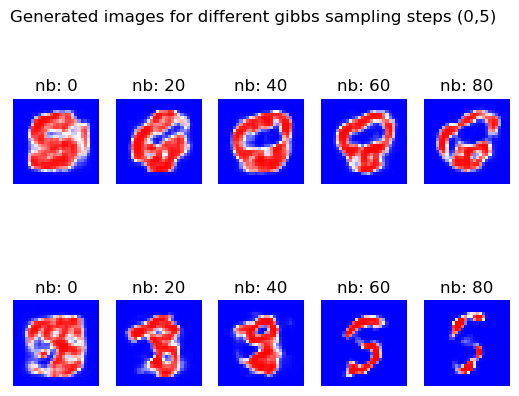

In [53]:


#how to plot the result in two figures
fig, axs = plt.subplots(2, 5)
fig.suptitle('Generated images for different gibbs sampling steps (0,5)')
for i in range(2):
    for j in range(5):
        axs[i,j].imshow(result[i][j*2].reshape(dbn.image_size), cmap="bwr", vmin=0, vmax=1, animated=True, interpolation=None)
        axs[i,j].axis('off')
        axs[i,j].set_title("nb: %i" % (j*20))
plt.savefig('generated_images.png')
plt.show()



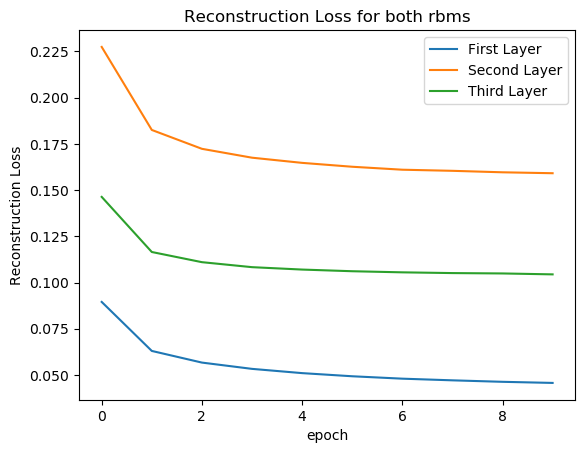

In [3]:
import matplotlib.pyplot as plt

recon_loss_first_layer = []
recon_loss_second_layer = []
recon_loss_first_layer.append(0.0895)
recon_loss_second_layer.append(0.2274)
recon_loss_first_layer.append(0.0630)
recon_loss_second_layer.append(0.1825)
recon_loss_first_layer.append(0.0567)
recon_loss_second_layer.append(0.1723)
recon_loss_first_layer.append(0.0533)
recon_loss_second_layer.append(0.1675)
recon_loss_first_layer.append(0.0510)
recon_loss_second_layer.append(0.1647)
recon_loss_first_layer.append(0.0493)
recon_loss_second_layer.append(0.1626)
recon_loss_first_layer.append(0.0480)
recon_loss_second_layer.append(0.1610)
recon_loss_first_layer.append(0.0471)
recon_loss_second_layer.append(0.1604)
recon_loss_first_layer.append(0.0463)
recon_loss_second_layer.append(0.1596)
recon_loss_first_layer.append(0.0457)
recon_loss_second_layer.append(0.1591)
recon_loss_thrid_layer=[]
recon_loss_thrid_layer.append(0.1463)
recon_loss_thrid_layer.append(0.1165)
recon_loss_thrid_layer.append(0.1110)
recon_loss_thrid_layer.append(0.1083)
recon_loss_thrid_layer.append(0.1070)
recon_loss_thrid_layer.append(0.1061)
recon_loss_thrid_layer.append(0.1055)
recon_loss_thrid_layer.append(0.1051)
recon_loss_thrid_layer.append(0.1049)
recon_loss_thrid_layer.append(0.1044)

plt.plot(recon_loss_first_layer, label='First Layer')
plt.plot(recon_loss_second_layer, label='Second Layer')
plt.plot(recon_loss_thrid_layer, label='Third Layer')
plt.xlabel('epoch')
plt.ylabel('Reconstruction Loss')
plt.legend()
plt.title('Reconstruction Loss for both rbms')
plt.savefig('reconstruction_loss_2.png')
plt.show()
